<a href="https://colab.research.google.com/github/ububu121/KNN/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [71]:
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [73]:
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [ ]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


In [75]:
print(grid_search.best_params_)
print('accuracy:{:0.4f}'.format(grid_search.best_score_))

{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
accuracy:0.9882


In [ ]:
knn_best = KNeighborsClassifier(**grid_search.best_params_)
knn_best.fit(X_train, y_train)

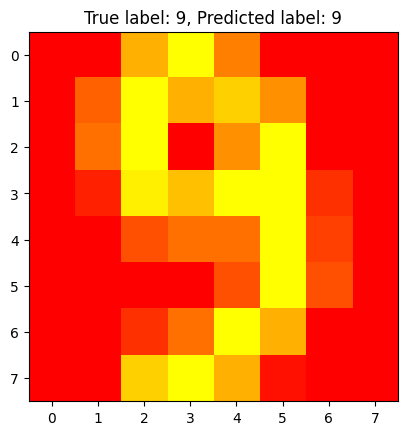

In [78]:
test_image_index = 180
test_image = X_test[test_image_index]
test_image_label = y_test[test_image_index]
test_image_pred = knn_best.predict(test_image.reshape(1, -1))

plt.imshow(test_image.reshape(8, 8), cmap='autumn')
plt.title(f"True label: {test_image_label}, Predicted label: {test_image_pred[0]}")
plt.show()

In [86]:
predictions = knn_best.predict(X_test)
from sklearn.metrics import accuracy_score
print('Точность предсказания:{:0.3f}'.format(accuracy_score(y_test, predictions)))


Точность предсказания:0.986
